In [4]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv(r"/content/Maternal Health Risk Data Set.csv")

In [21]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
df.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age            181.559065
SystolicBP     338.704005
DiastolicBP    192.815323
BS              10.847351
BodyTemp         1.880695
HeartRate       65.427104
dtype: float64

In [ ]:
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age            13.474386
SystolicBP     18.403913
DiastolicBP    13.885796
BS              3.293532
BodyTemp        1.371384
HeartRate       8.088702
dtype: float64

In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age            0.783063
SystolicBP    -0.251189
DiastolicBP   -0.048441
BS             1.868203
BodyTemp       1.750988
HeartRate     -1.043525
dtype: float64

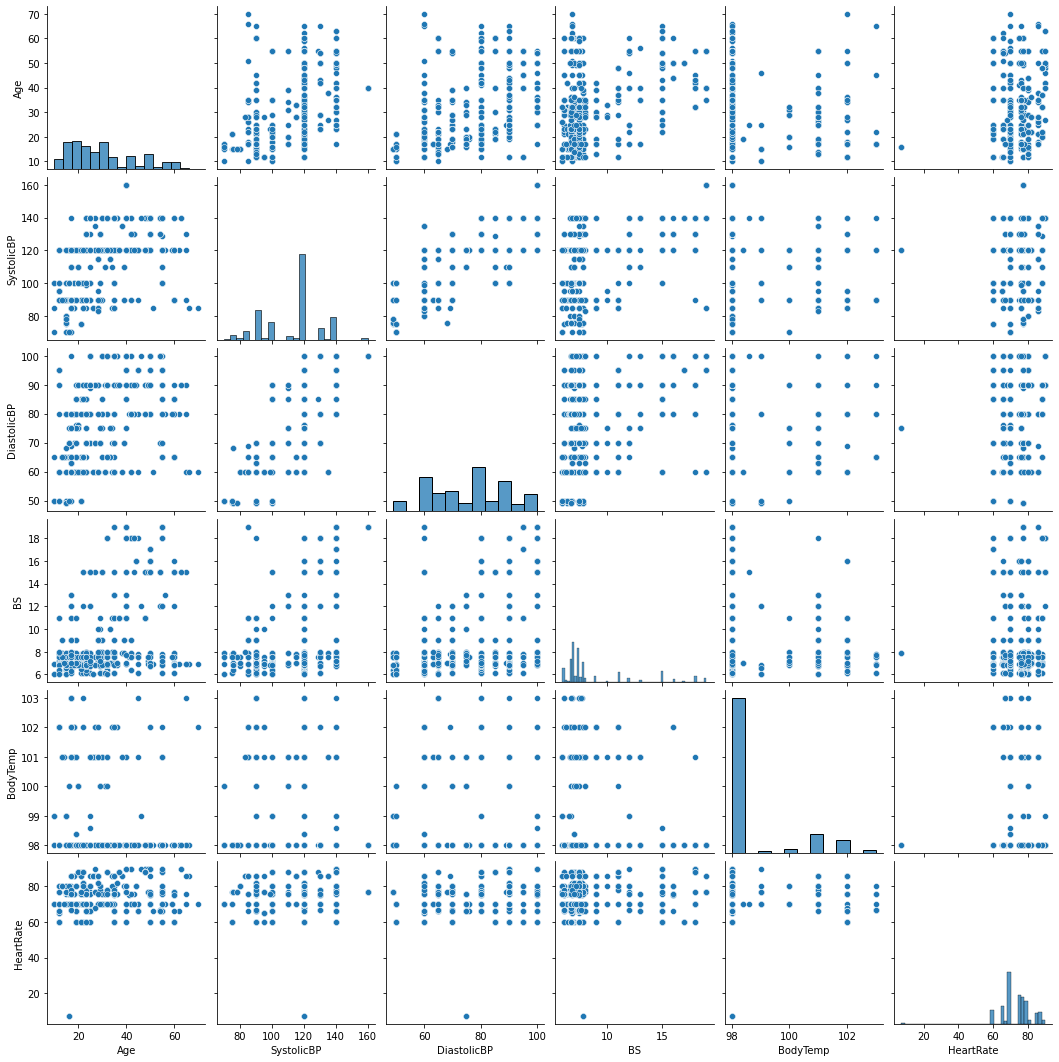

In [23]:
sns.pairplot(df, palette = "flag")

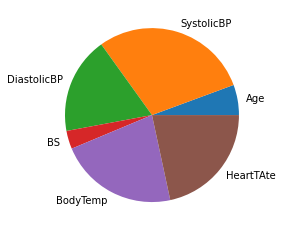

In [11]:
y = np.array([25,130,80, 15,98,96])
mylabels = ["Age", "SystolicBP", "DiastolicBP", "BS","BodyTemp","HeartTAte"]

plt.pie(y, labels = mylabels)
plt.show() 

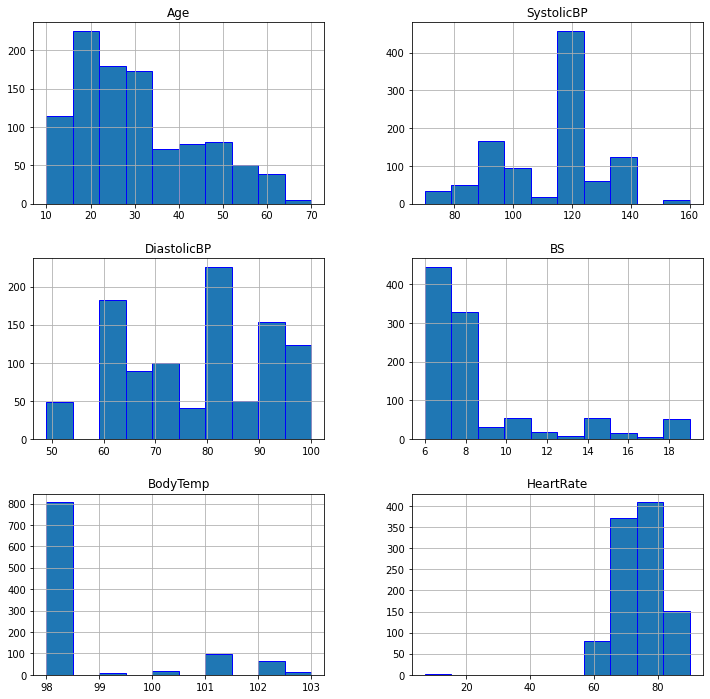

In [ ]:
df.hist(edgecolor='blue',figsize=(12,12));

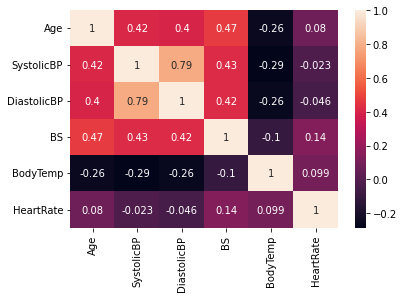

In [ ]:
sns.heatmap(
    df.corr(),
    annot=True
)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

df['RiskLevel'] =lb.fit_transform(df['RiskLevel'])

In [ ]:
y=df["RiskLevel"]
x=df.iloc[:,df.columns!=("RiskLevel")]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
pred=model.predict(X_test)
pred

array([2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0,
       1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2,
       2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0])

In [ ]:
train=model.score(X_train,y_train)
train

0.6374845869297164

In [ ]:
test=model.score(x_test,y_test) 
test

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.625615763546798

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
rf_clf.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(rf_clf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf_clf.score(x_test, y_test)))

# print the scores on training and test set

print('Training set score: {:.4f}'.format(rf_clf.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(rf_clf.score(x_test, y_test)))


Accuracy on training set: 0.936
Accuracy on test set: 0.828
Training set score: 0.9359
Test set score: 0.8276


In [ ]:
from sklearn import metrics 
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77        47
           1       0.62      0.89      0.73        80
           2       0.68      0.28      0.39        76

    accuracy                           0.65       203
   macro avg       0.67      0.67      0.63       203
weighted avg       0.66      0.65      0.61       203



In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

from sklearn.metrics import  accuracy_score
score=accuracy_score(y_test,y_pred)

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

In [ ]:

input_data=(25,130,80,15,98,86)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print("High risk")
elif(prediction[1]==1):
    print("Mid risk")
else:
    print("Low risk")
    

[0]
High risk


In [ ]:
import pickle
filename='trained_model.sav'
pickle.dump(classifier,open(filename,'wb'))
loaded_model=pickle.load(open('trained_model.sav','rb'))


input_data=(25,130,80,15,98,86)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshaped)
print(prediction)


if(prediction[0]==0):
    print("High risk")
elif(prediction[1]==1):
    print("Mid risk")
else:
    print("Low risk")

[0]
High risk
